# Lab | Cleaning numerical data

## 1) Libraries

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

## 2) Load data

In [2]:
customer_df = pd.read_csv('files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

## 3) First look

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
display(customer_df.shape)
customer_df.info()

(9134, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

From previous work, I know that some of these columns can be translated into numerical columns, but I think that is not the point today.

## 4) Naming conventions
**Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)**

In [5]:
customer_df.columns = [colname.lower().replace(' ','_') for colname in customer_df.columns]
#Taken from FIFA lab
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

## 5) Transforming dates
**Change `effective_to_date` column to datetime format.**

In [6]:
customer_df.effective_to_date = pd.to_datetime(customer_df.effective_to_date)

`pd.to_datetime` can work with the date format already in the table, no other editing required.
Also, when using only one table, I prefer to use the dot notation, as in `customer_df.effective_to_date`.

## 6) Continous and discrete values
**Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df.**  
By definition, the categorical columns have discrete values, so the focus here are the numerical columns.

In [7]:
numerical = customer_df.select_dtypes(include = np.number)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [8]:
categorical_df = customer_df.select_dtypes(include = 'object')
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [9]:
print(len(numerical.customer_lifetime_value.value_counts()))
print(len(numerical.income.value_counts()))
print(len(numerical.monthly_premium_auto.value_counts()))
print(len(numerical.months_since_last_claim.value_counts()))
print(len(numerical.months_since_policy_inception.value_counts()))
print(len(numerical.number_of_open_complaints.value_counts()))
print(len(numerical.number_of_policies.value_counts()))
print(len(numerical.total_claim_amount.value_counts()))

8041
5694
202
36
100
6
9
5106


In [10]:
len(numerical)

9134

In [17]:
def continous_or_discreet(table, frontier = 10):
    #Arguments:
        #table: the dataframe to separate. While the function will work with categorical data, numerical is expected
        #frontier: the division between the value counts to decide when a column is 'continous_or_discreet' using the operation table_size/frontier
    #Returns:
        #continous_df
        #discreet_df
    table_size = len(table)
    table_frontier = table_size/frontier
    continous_names = []
    discreet_names = []
    
    for col in table.columns:
        if len(table[col].value_counts()) > table_frontier:
            continous_names.append(col)
        else:
            discreet_names.append(col)
    
    continous_df = pd.DataFrame(table[continous_names])
    discreet_df = pd.DataFrame(table[discreet_names])
    
    return (continous_df,discreet_df)

In [14]:
(continous_df,discreet_df) = continous_or_discreet(numerical)

In [22]:
continous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [15]:
discreet_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


## 7) Correlations
**Plot a correlation matrix.**

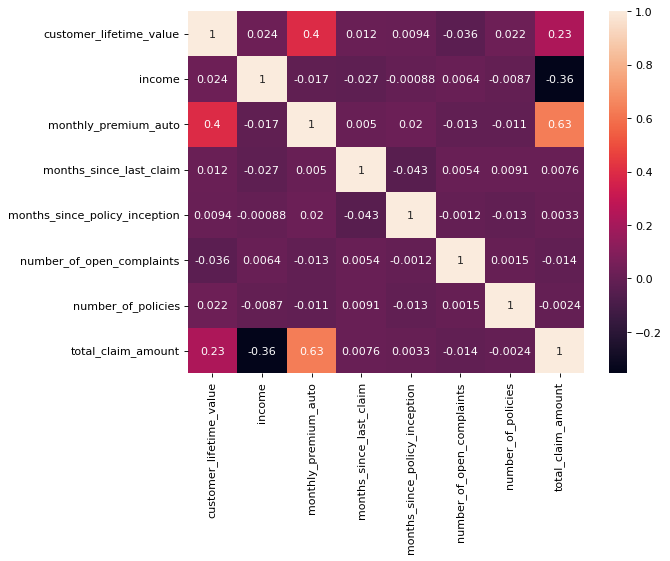

In [21]:
correlations_matrix = numerical.corr()

figure(figsize=(8, 6), dpi=80)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

There is no strong correlation between any columns, the higher being between `monthly_premium_auto` and `total_claim_amount` with 0.63

## 8) Plotting variables
Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

<AxesSubplot:>

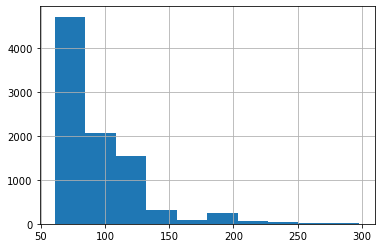

In [24]:
discreet_df['monthly_premium_auto'].hist()

In [52]:
def discreet_plot(table):
    for col in table.columns:
        sns.displot(x=col, data=table)
        plt.show()

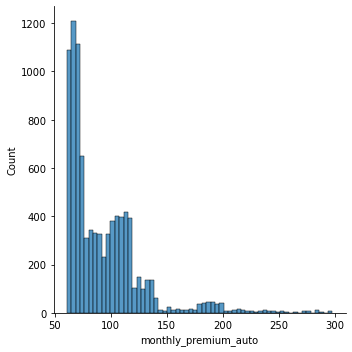

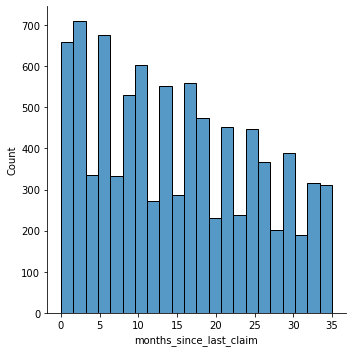

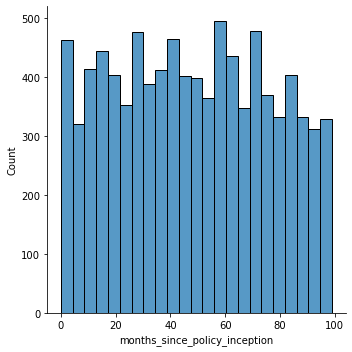

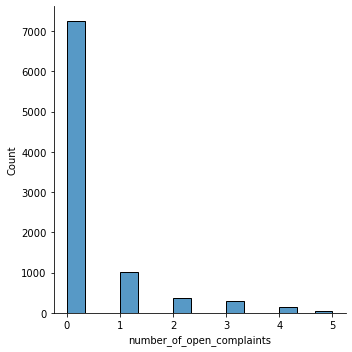

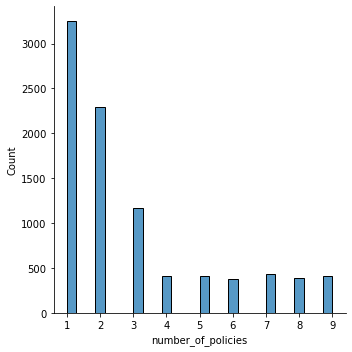

In [53]:
discreet_plot(discreet_df)

In [66]:
def continous_plot(table):
    for col in table.columns:
        ax = plt.subplots() 
#         ax = sns.displot(x=col, data=table, kind='kde', bw_adjust=.25)
        ax = sns.boxplot(x=col, data=table)
#         x.set(xlabel="x-axis", ylabel="y-axis")
        plt.show() 
#     I tried to plot two plots in the same figure, it is still not possible for me

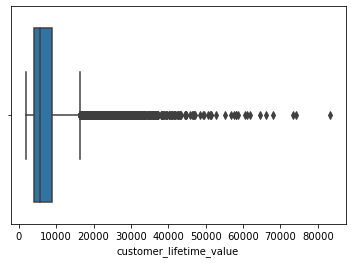

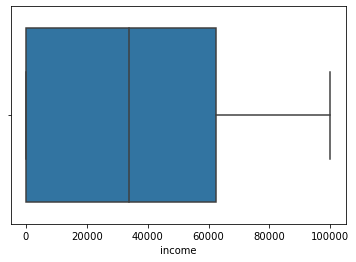

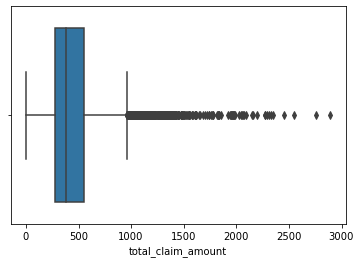

In [65]:
continous_plot(continous_df)


## 9) Analyzing plots
Comment what you can see in the plots.

-- Discreet variables:

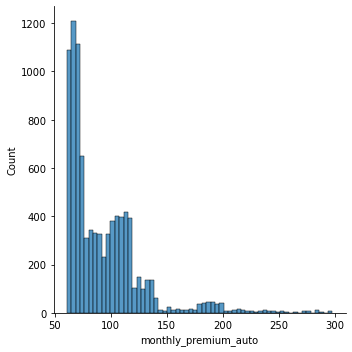

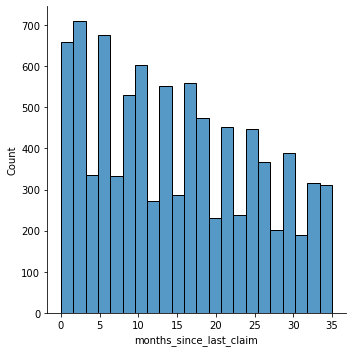

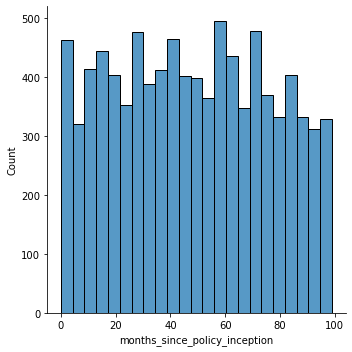

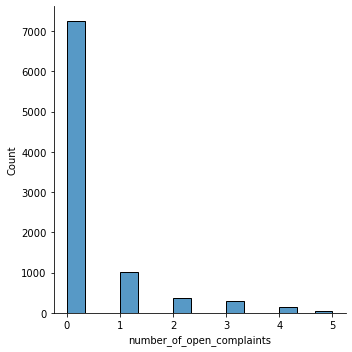

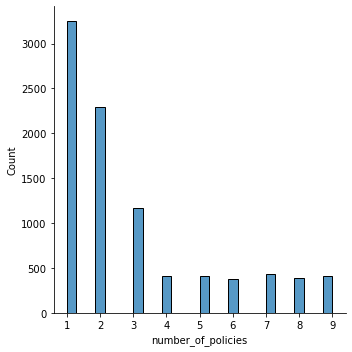

In [67]:
discreet_plot(discreet_df)

The `monthly_premium_auto` column shows a wide range, with what look like a high amount of outliers, with most of the values in [60-140].  
`months_since_last_claim` and `months_since_policy_inception` seem to be more evenly distributed, while the last two are almost as concentrated as the first one, but with less different values.

-- Continous variables:

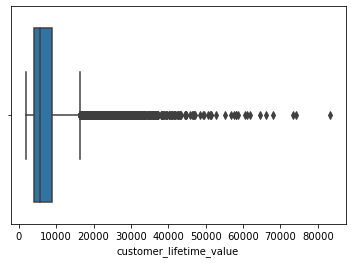

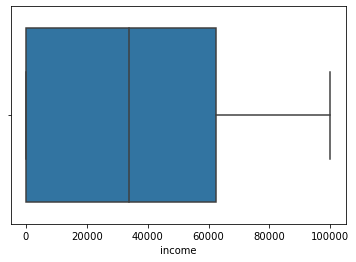

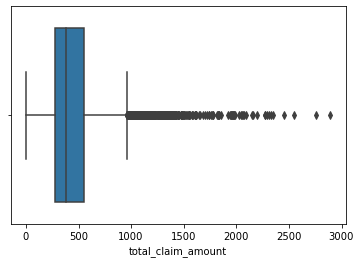

In [68]:
continous_plot(continous_df)


`customer_lifetime_value` and `total_claim_amount` have a big amount of outliers, with a low dispersion of the central values, while `income` has no apparent outliers, and the bulk of its data is more dispersed.

## 10) Continous outliers
Look for outliers in the continuous variables. 

As seen in the question above, only `customer_lifetime_value` and `total_claim_amount` show outliers, and only on the right side (above 75%)

## 11) Outlier management
Did you find outliers? Comment what you will do with them.
First I want to check how many outliers are in each column:

In [73]:
iqr = np.nanpercentile(continous_df['customer_lifetime_value'],75) - np.nanpercentile(continous_df['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(continous_df['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

outliers = continous_df[continous_df['customer_lifetime_value'] > upper_limit]
len(outliers)

16414.039911750002


817

For this column, almost 10% of the values fall outside of the 75 percentile. I may give them the `upper_limit` value, if I think they should be kept.

In [75]:
iqr2 = np.nanpercentile(continous_df['total_claim_amount'],75) - np.nanpercentile(continous_df['total_claim_amount'],25)
upper_limit2 = np.nanpercentile(continous_df['total_claim_amount'],75) + 1.5*iqr2
print(upper_limit2)

outliers2 = continous_df[continous_df['total_claim_amount'] > upper_limit2]
len(outliers2)

960.3997301249999


453

On the other hand, with less than 5% of the values being outliers, I would drop these.  
After dropping, I would need to calculate again for the previous column, to see if it needs more work.

## 12) NaN values
Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [76]:
numerical.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

There are no NaN values in this case.